In [194]:
# importation des librairy
import pandas as pd

from skimpy import skim
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## lecture des csv

In [195]:
df_aeronefs = pd.read_csv('dataset/aeronefs_2024-06-02.csv')
df_composants = pd.read_csv('dataset/composants_2024-06-02.csv')
df_logs_vols = pd.read_csv('dataset/logs_vols.csv')
df_degradations = pd.read_csv('dataset/degradations.csv')

## Nettoyage des df

In [196]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27 00:00:00,False,NaN
1,B767_2803,B767,2020-12-03,2024-06-01 00:00:00,False,NaN
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04 00:00:00,False,NaN
4,B777_4029,B777,2009-01-01,2024-06-01 00:00:00,False,NaN


In [197]:
# info sur le df
skim(df_aeronefs)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 232    │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ bool        │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ true           ┃ true rate                  ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ en_maintenance                          │             15 │                      0.065 │       ▇    ▁       │  │
│ └─────────────────────────────────────────┴────────────────┴────────────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA       ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_aero                    │        0 │           0 │                          1 │                    232 │  │
│ │ type_model                  │        0 │           0 │                          1 │                    232 │  │
│ │ debut_service               │        0 │           0 │                          1 │                    232 │  │
│ │ last_maint                  │        0 │           0 │                        1.9 │                    449 │  │
│ │ end_maint                   │      217 │       93.53 │                       0.13 │                     30 │  │
│ └─────────────────────────────┴──────────┴─────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [198]:
# retravaille des colonne date
cols = ['debut_service', 'last_maint', 'end_maint']

for col in cols:

    df_aeronefs[f'{col}_temp'] = pd.to_datetime(df_aeronefs[col], errors='coerce')
    df_aeronefs[f'{col}_temp'] = df_aeronefs.apply(lambda x : x[col] if pd.isna(x[f'{col}_temp']) else x[f'{col}_temp'], axis=1)

    df_aeronefs[col] = df_aeronefs[f'{col}_temp'] 

    # suppression de al colonne temporaire
    df_aeronefs = df_aeronefs.drop(f'{col}_temp', axis=1)

    df_aeronefs[col] = pd.to_datetime(df_aeronefs[col], errors='coerce')

df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,False,NaT
1,B767_2803,B767,2020-12-03,2024-06-01,False,NaT
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04,False,NaT
4,B777_4029,B777,2009-01-01,2024-06-01,False,NaT


In [199]:
skim(df_aeronefs)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 232    │ │ datetime64  │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ true           ┃ true rate                  ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ en_maintenance                          │             15 │                      0.065 │       ▇    ▁       │  │
│ └─────────────────────────────────────────┴────────────────┴────────────────────────────┴────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %    ┃ first                     ┃ last                      ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ debut_service      │     0 │       0 │        2000-02-03         │        2022-11-11         │ None        │  │
│ │ last_maint         │     0 │       0 │        2023-07-02         │        2024-06-02         │ None        │  │
│ │ end_maint          │   217 │   93.53 │    2024-06-03 14:13:00    │    2024-06-16 14:13:00    │ None        │  │
│ └────────────────────┴───────┴─────────┴───────────────────────────┴───────────────────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_aero                  │       0 │          0 │                            1 │                      232 │  │
│ │ type_model                │       0 │          0 │                            1 │                      232 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [206]:
# observation des valeurs null par colonne
cols = df_aeronefs.columns

for col in cols:
    if len(df_aeronefs[df_aeronefs[col].isna()]) == 0:
        print(f'col : {col} ok plein')
    else:
        print()
        print(f'col : {col} avec des null')

col : ref_aero ok plein
col : type_model ok plein
col : debut_service ok plein
col : last_maint ok plein
col : en_maintenance ok plein

col : end_maint avec des null


<Axes: >

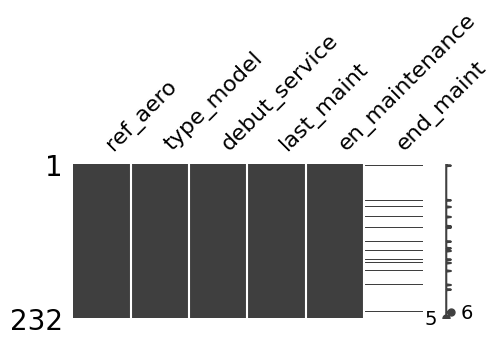

In [216]:
msno.matrix(df_aeronefs, figsize=(5, 2))

In [200]:
df_aeronefs.nunique()

ref_aero          231
type_model         15
debut_service     227
last_maint         79
en_maintenance      2
end_maint           2
dtype: int64

In [201]:
# recherche du doublon de ref_aero et l'afficher.
duplicates = df_aeronefs[df_aeronefs.duplicated(subset='ref_aero', keep=False)]
print("Doublons basés sur la colonne 'ref_aero':")

duplicates

Doublons basés sur la colonne 'ref_aero':


,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
40,E170_5551,E170,2017-02-07,2024-06-01,False,NaT
230,E170_5551,E170,2021-04-10,2024-06-01,False,NaT


In [202]:
# renommer les ref_aero si doublons ? 
# --> si ref_aero est reference après

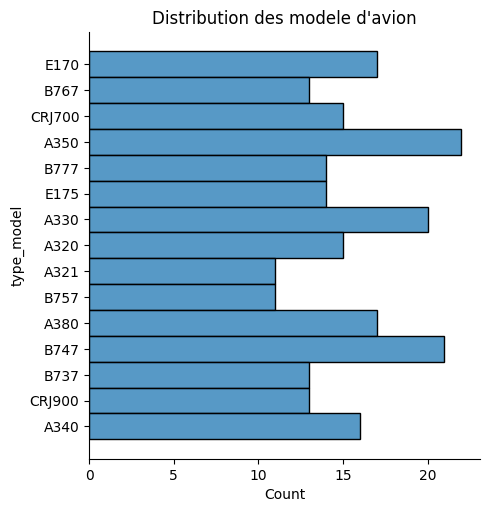

In [219]:
#affichage de la repartition des model d'avion
sns.displot(data = df_aeronefs, y= 'type_model')
plt.title(f'Distribution des modele d\'avion')

plt.show()

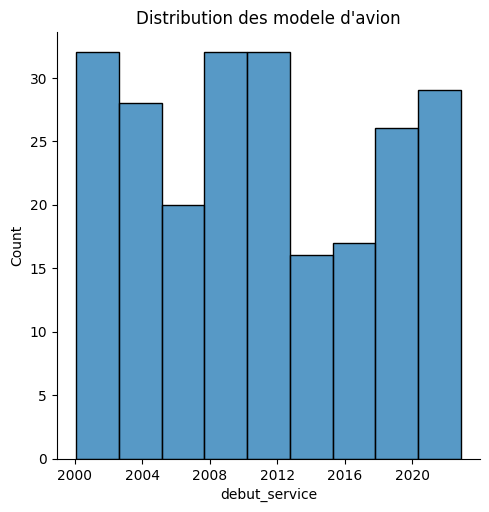

In [204]:
# debut_service
sns.displot(data = df_aeronefs['debut_service'])
plt.title(f'Distribution des modele d\'avion')

plt.show()

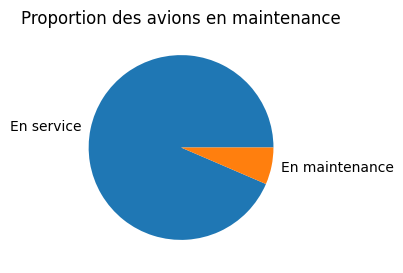

In [221]:
#affichage de la repartition des en maintenance

# glpobal
compte = df_aeronefs['en_maintenance'].value_counts()
labels = ['En service', 'En maintenance']

fig= plt.figure(figsize=(3,3))

plt.pie(compte, labels = labels)
plt.title(f'Proportion des avions en maintenance')

plt.show()

In [208]:
# vérification si avion en maintenance alors date de prevision de fin de maintenance et inverse vrai

df_temp_en_maintenance_T = df_aeronefs[df_aeronefs['en_maintenance'] ==True]

df_temp_en_maintenance_T[df_temp_en_maintenance_T['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


In [209]:
df_temp_en_maintenance_F = df_aeronefs[df_aeronefs['en_maintenance'] == False]

df_temp_en_maintenance_F[~df_temp_en_maintenance_F['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


Conclusion sur les valuers Null de end_maintenance :
Si un avion est en maintence (True) alors il y a une date.
Si un avion n'est pas en maintenance alors le champ est null.

Il est potentielement possible de remplacer par la date du jour la fin de maintenance prévisionnel car ça signifie 0 jour jusqu'à la remise en service de l'appareil.